<a href="https://colab.research.google.com/github/isabelntho/ML_final_project/blob/main/plot_LC_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install geopandas --quiet

     |████████████████████████████████| 1.0 MB 7.4 MB/s 
     |████████████████████████████████| 16.7 MB 28.6 MB/s 
     |████████████████████████████████| 6.3 MB 40.5 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from google.colab import drive
import os

In [3]:
#connect to drive folder
drive.mount('/test_folder')
%cd "/test_folder/MyDrive/test_folder"
dir_list =  os.listdir()

Mounted at /test_folder
/test_folder/MyDrive/test_folder


In [4]:
#read in dataset
df = pd.read_csv('results_for_test_2004-2009_2505.csv')

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,field_1,E,N,LC85_27,LC97_27,LC09R_27,LC18_27,LC85_6,...,new_y,index_right,n,folds,B1,B2,B3,B4,B5,preds
0,0,0,1,2487500,1111900,21,21,21,21,20,...,5114946,38,568.0,3,9246,10022,9689,10887,8962,60
1,1,1,2,2487500,1112000,21,21,21,21,20,...,5115046,38,568.0,3,8592,9088,8803,10887,8962,60
2,2,2,3,2487500,1112100,21,21,21,21,20,...,5115146,38,568.0,3,8686,9275,8803,11057,8851,60
3,3,3,4,2487500,1112200,21,21,21,21,20,...,5115246,38,568.0,3,8685,9275,8951,10887,8741,60
4,4,4,5,2487500,1112300,21,21,21,21,20,...,5115346,38,568.0,3,9341,10023,9838,11057,9403,60


In [6]:
#convert dataframe to geodataframe
gdf = gpd.GeoDataFrame(df, 
            geometry=gpd.points_from_xy(df.E, df.N),
            crs="+proj=utm +zone=31 +datum=WGS84 +units=m +no_defs")
gdf.head()

,Unnamed: 0,Unnamed: 0.1,field_1,E,N,LC85_27,LC97_27,LC09R_27,LC18_27,LC85_6,...,index_right,n,folds,B1,B2,B3,B4,B5,preds,geometry
0,0,0,1,2487500,1111900,21,21,21,21,20,...,38,568.0,3,9246,10022,9689,10887,8962,60,POINT (2487500.000 1111900.000)
1,1,1,2,2487500,1112000,21,21,21,21,20,...,38,568.0,3,8592,9088,8803,10887,8962,60,POINT (2487500.000 1112000.000)
2,2,2,3,2487500,1112100,21,21,21,21,20,...,38,568.0,3,8686,9275,8803,11057,8851,60,POINT (2487500.000 1112100.000)
3,3,3,4,2487500,1112200,21,21,21,21,20,...,38,568.0,3,8685,9275,8951,10887,8741,60,POINT (2487500.000 1112200.000)
4,4,4,5,2487500,1112300,21,21,21,21,20,...,38,568.0,3,9341,10023,9838,11057,9403,60,POINT (2487500.000 1112300.000)


In [7]:
#create colormap, based on NOLC04 colour scheme used by FSO
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
colors = ['#909896','#d1eb6b','#14d514', '#346d1b', '#d0aa4a', '#377bd4']
mycmap = ListedColormap(colors)

Text(0.5, 1.0, 'RF classified 2004')

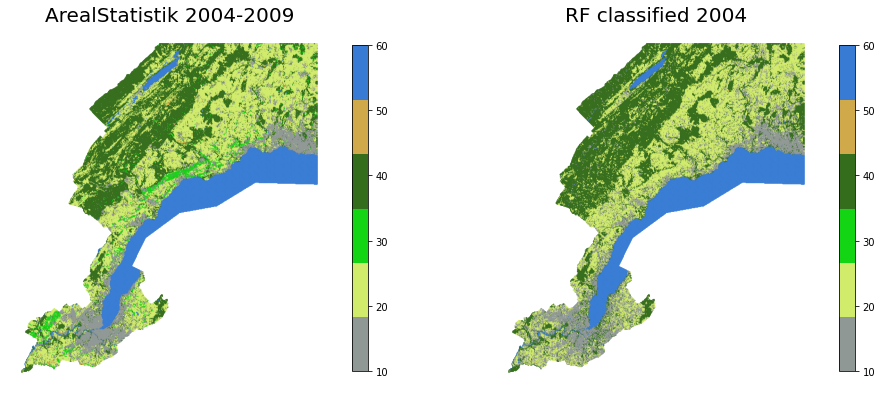

In [14]:
#set up plot
fig, axes = plt.subplots(figsize=(16, 10), ncols=2)
ax0, ax1 = axes

#plot truth data
gdf.plot(ax=ax0, column='LC09R_6', markersize=.1, cmap=mycmap, legend=True, legend_kwds={'shrink': 0.6})
ax0.axis("off")
ax0.set_title("ArealStatistik 2004-2009", fontsize=20)
#plot RF classified data
gdf.plot(ax=ax1, column='preds', markersize=.1, cmap=mycmap, legend=True, legend_kwds={'shrink': 0.6})
ax1.axis("off")
ax1.set_title("RF classified 2004", fontsize=20)